In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
data=pd.read_csv('/kaggle/input/loan-data/loan_data.csv')

In [16]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [18]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [22]:
purpose_values=list(data['purpose'].unique())
purpose_values

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

In [23]:
purpose_mappings={label:index for index,label in enumerate(purpose_values)}
purpose_mappings

{'debt_consolidation': 0,
 'credit_card': 1,
 'all_other': 2,
 'home_improvement': 3,
 'small_business': 4,
 'major_purchase': 5,
 'educational': 6}

In [24]:
data['purpose']=data['purpose'].apply(lambda x:purpose_mappings[x])

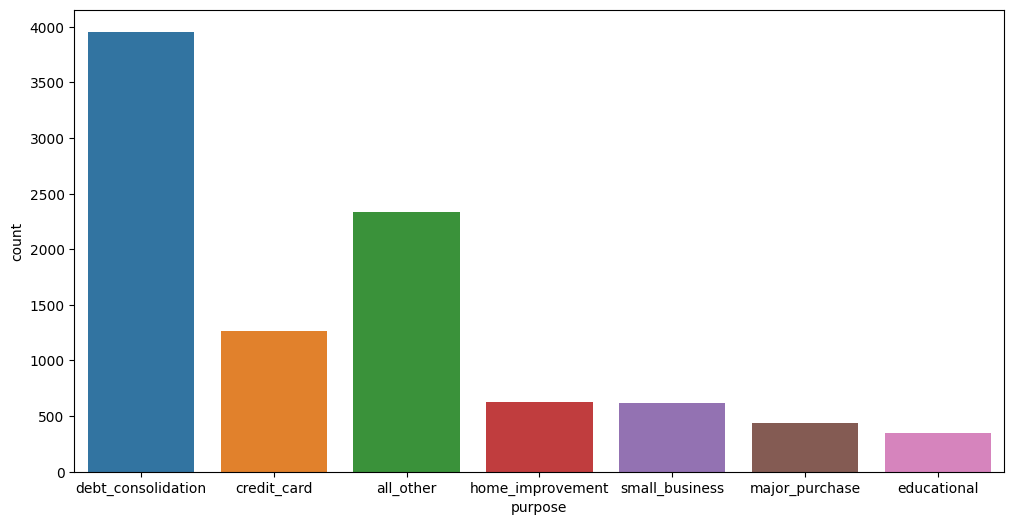

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=data)
plt.show()

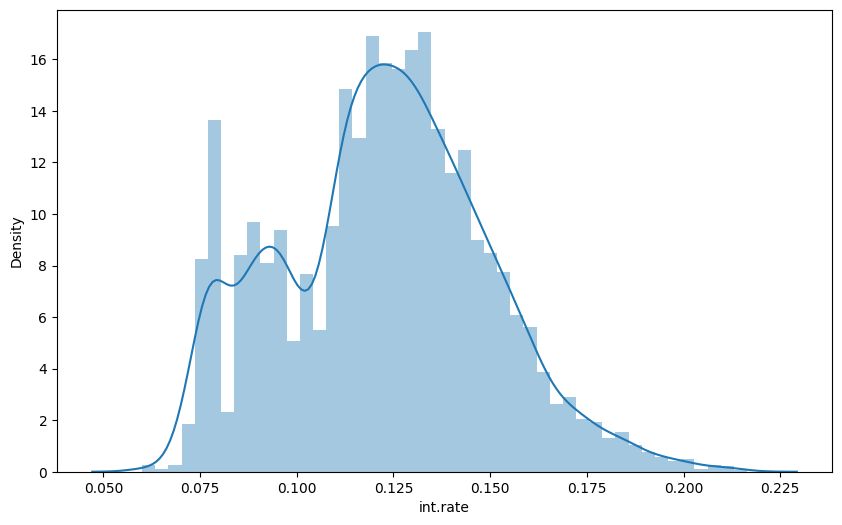

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(data['int.rate'])
plt.show()

<Axes: >

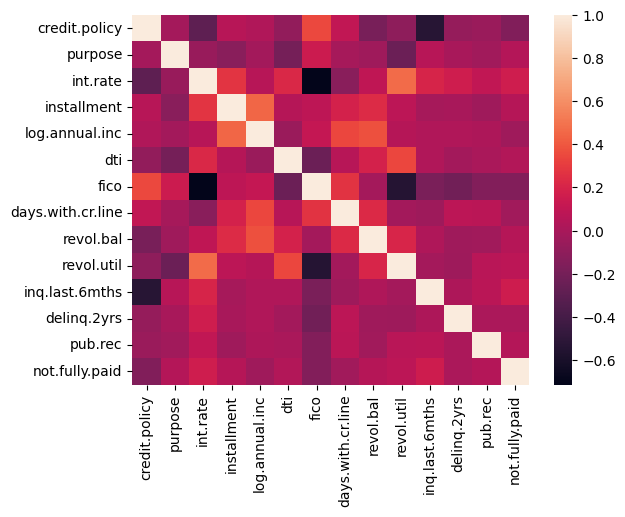

In [25]:
sns.heatmap(data.corr())

In [56]:
y=data['revol.bal']
X=data.drop('revol.bal',axis=1)

In [57]:
scaler=RobustScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [58]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.0,-0.5,-0.086957,2.082400,0.575160,0.634692,0.545455,0.515464,0.120083,-0.5,0.0,0.0,0.0
1,0.0,0.0,-0.407609,-0.151417,0.209119,0.151339,0.000000,-0.474212,0.629400,-0.5,0.0,0.0,0.0
2,0.0,-0.5,0.369565,0.363988,-0.757822,-0.096391,-0.454545,0.195891,-0.428571,0.0,0.0,0.0,0.0
3,0.0,-0.5,-0.578804,-0.396331,0.575160,-0.425146,0.090909,-0.494845,0.556936,0.0,0.0,0.0,0.0
4,0.0,0.0,0.557065,-0.617229,0.506016,0.214668,-0.727273,-0.025415,-0.140787,-0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-1.0,0.5,0.652174,0.281829,1.708155,-0.211874,-0.636364,2.176647,0.741201,0.5,0.0,0.0,1.0
9574,-1.0,0.5,0.086957,-0.041823,0.290605,-1.159953,0.272727,0.082489,-0.935818,2.0,0.0,0.0,1.0
9575,-1.0,-0.5,-0.407609,-0.636226,-0.453347,0.039581,-0.363636,-0.237085,0.757764,3.5,0.0,0.0,1.0
9576,-1.0,1.0,1.029891,0.307183,-0.148872,0.606752,-0.272727,-0.804109,-0.892340,2.0,0.0,0.0,1.0


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [61]:
sk_model=MLPClassifier(hidden_layer_sizes=(32,32))
sk_model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(32, 32))

In [62]:
inputs=tf.keras.Input(shape=(13,))
x=tf.keras.layers.Dense(32,activation=tf.nn.relu)(inputs)
x=tf.keras.layers.Dense(32,activation=tf.nn.relu)(x)
outputs=tf.keras.layers.Dense(2,activation=tf.nn.softmax)(x)

tf_model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [63]:
tf_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [64]:
tf_model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=200
)

Epoch 1/200
 82/479 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 6.4271e-04 - loss: nan

W0000 00:00:1710227490.093512     310 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


479/479 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 4.6582e-04 - loss: nan
Epoch 2/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.4597e-04 - loss: nan
Epoch 3/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.9548e-04 - loss: nan
Epoch 4/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 3.4047e-04 - loss: nan
Epoch 5/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.3539e-04 - loss: nan
Epoch 6/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.0534e-04 - loss: nan
Epoch 7/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 2.8881e-04 - loss: nan
Epoch 8/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.3631e-04 - loss: nan
Epoch 9/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.7103e-04 - loss: nan
Epoch 10/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.8592e-04 - loss: nan
Epoch 11/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 4.9355e-04 - loss: nan
Epoch 12/200
479/479 ━━━━━━━━━━━━━━━━━━━━ 

In [65]:
sk_score=sk_model.score(X_train,y_train)
tf_score=tf_model.evaluate(X_train,y_train,verbose=False)
print(f"Sklearn Model:{sk_score}")
print(f"Tensorflow Model:{tf_score[1]}")

Sklearn Model:0.9766379535369355
Tensorflow Model:0.00039154267869889736
